<a href="https://colab.research.google.com/github/syedshahlal/Understanding_Computer_Vision/blob/main/Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

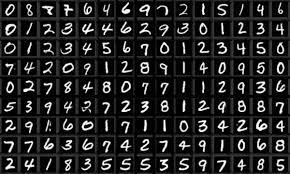

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(X_train_full, y_train_full) , (X_test, y_test) =mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
y_train_full[0]

5

In [6]:
y_train_full.shape

(60000,)

In [7]:
y_test.shape

(10000,)

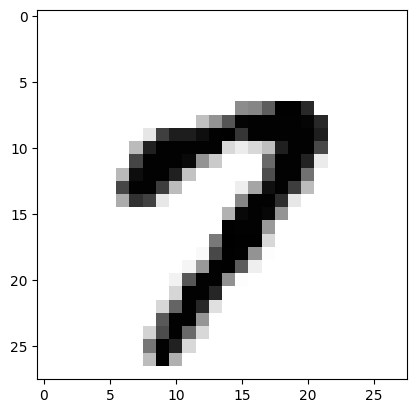

In [8]:
plt.imshow(X_train_full[15], cmap='binary')

<Axes: >

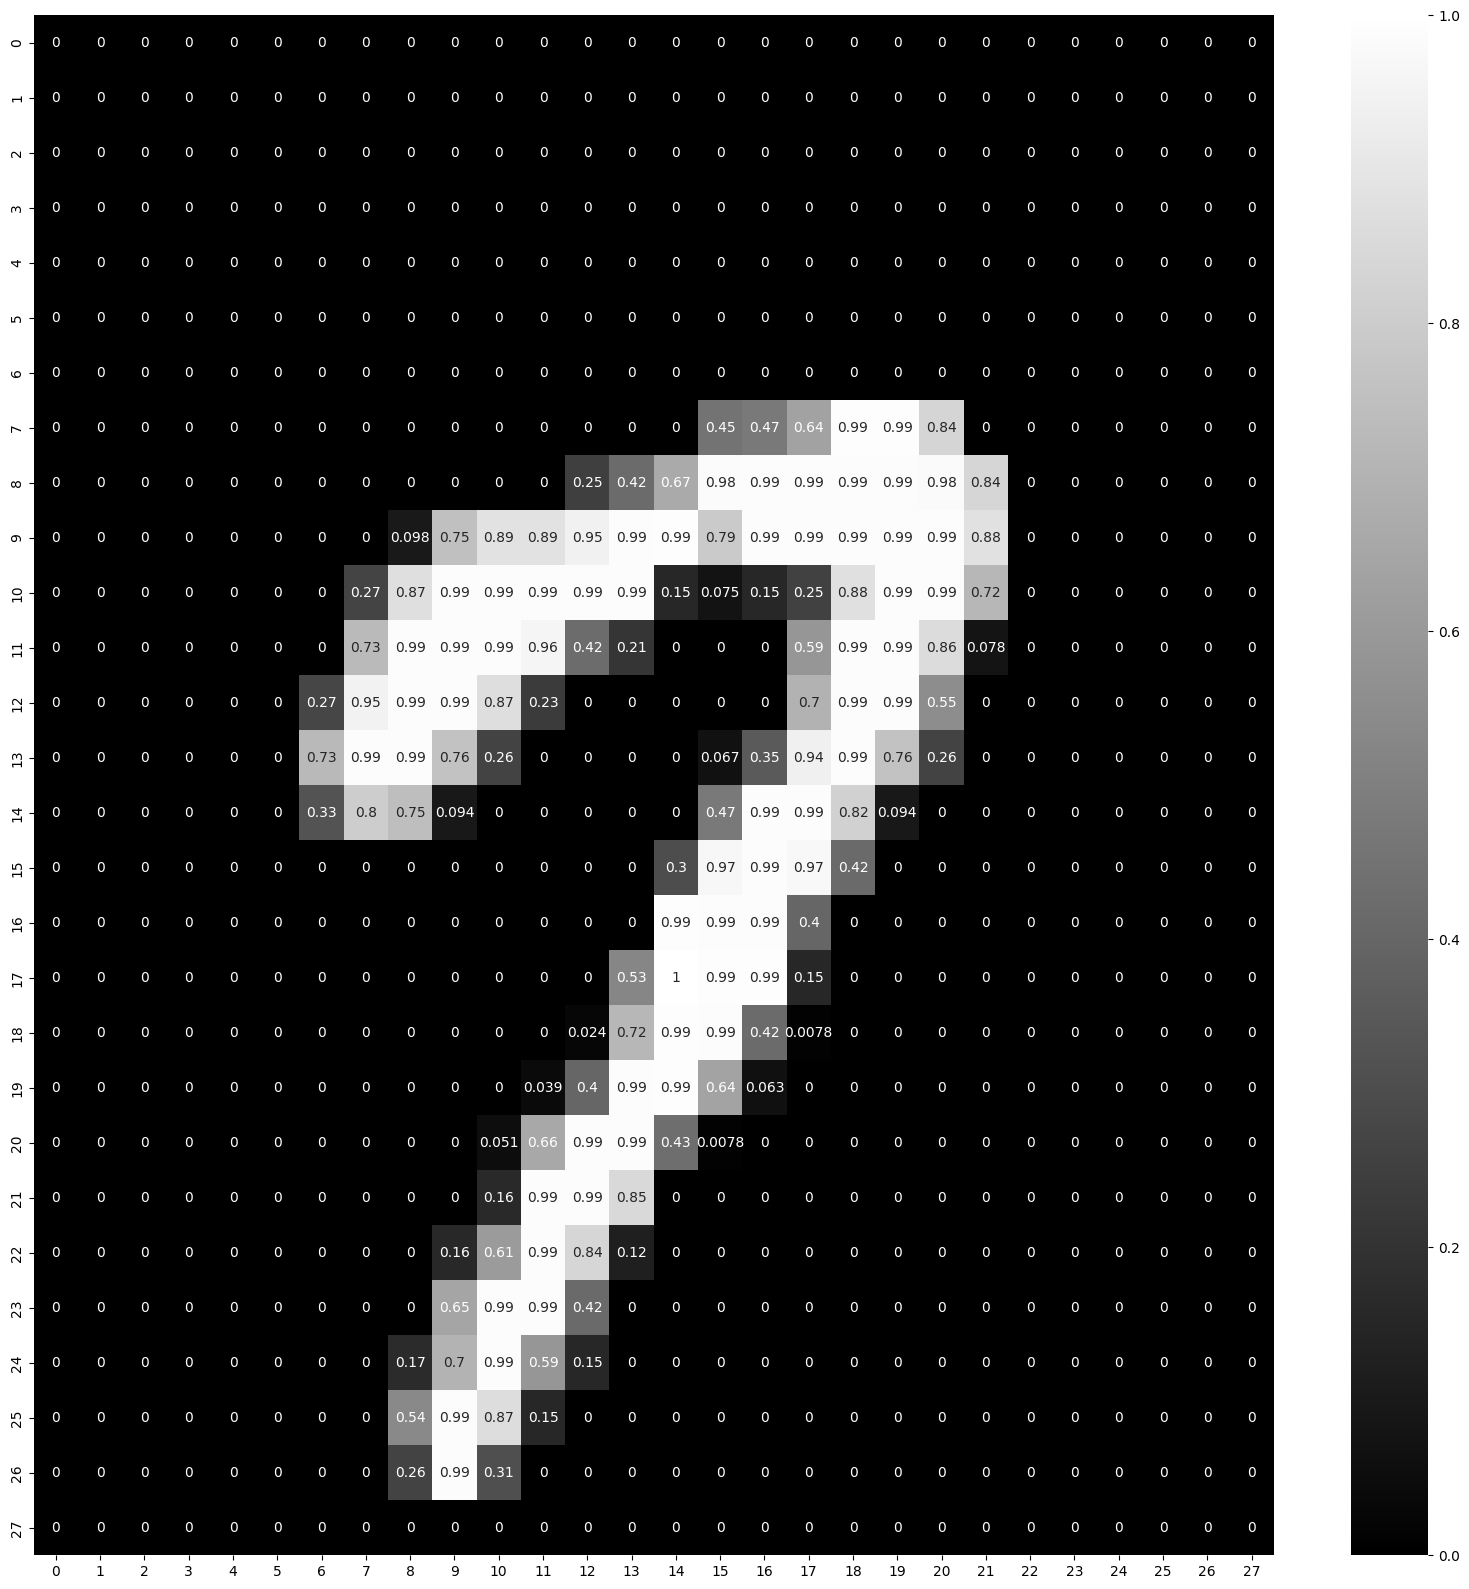

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap((X_train_full[15])/255, annot=True, cmap='gray')

In [10]:
1e+02

100.0

In [11]:
X_train_full[5000:].shape

(55000, 28, 28)

In [12]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255

In [13]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [14]:
X_test=X_test/255

In [15]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [16]:
CLASSES=len(np.unique(y_train))
CLASSES

10

In [17]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28,28),name='inputLayer'),
    tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
    tf.keras.layers.Dense(CLASSES, activation="softmax", name="outputLayer" )

]

In [18]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [19]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "ADAM"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS, metrics= METRICS)

In [21]:
EPOCHS = 30

VALIDATION = (X_valid, y_valid)

history = model_clf.fit(
    X_train,
    y_train,
    epochs = EPOCHS,
    validation_data=VALIDATION
)

Epoch 1/30
1719/1719 [==============================] - 13s 5ms/step - loss: 0.2160 - accuracy: 0.9363 - val_loss: 0.0994 - val_accuracy: 0.9708
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0888 - accuracy: 0.9718 - val_loss: 0.0785 - val_accuracy: 0.9772
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0620 - accuracy: 0.9795 - val_loss: 0.0798 - val_accuracy: 0.9754
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0450 - accuracy: 0.9848 - val_loss: 0.0787 - val_accuracy: 0.9796
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0349 - accuracy: 0.9885 - val_loss: 0.0846 - val_accuracy: 0.9774
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0297 - accuracy: 0.9903 - val_loss: 0.0727 - val_accuracy: 0.9808
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0227 - accuracy: 0.9923 - val_loss: 0.0967 - val_accuracy

In [22]:
history=pd.DataFrame(history.history)

<function matplotlib.pyplot.show(close=None, block=None)>

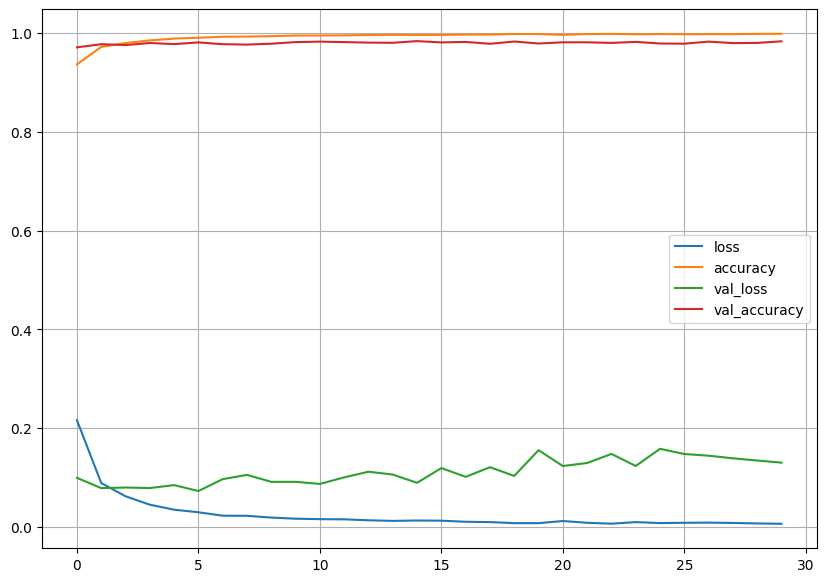

In [23]:
history.plot(figsize=(10,7))
plt.grid(True)
plt.show

In [24]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1357 - accuracy: 0.9809


[0.13572347164154053, 0.98089998960495]

In [25]:
model_clf.save("mnist_full.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
X_new = X_test[:3]

y_prob =model_clf.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 107ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

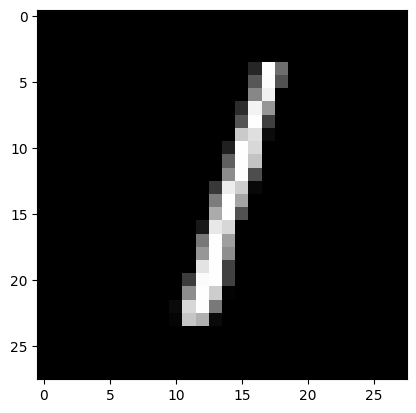

In [27]:
plt.imshow(X_new[2], cmap='gray')

In [28]:
y_pred=np.argmax(y_prob, axis=-1)
y_pred

array([7, 2, 1])

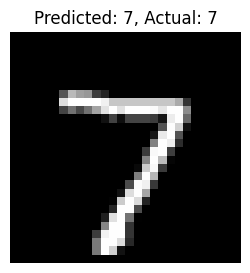

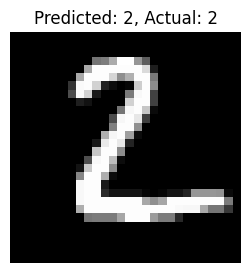

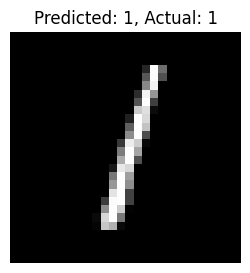

In [34]:
for img_array, pred, actual in zip(X_new, y_pred, y_test[:3]):
  plt.figure(figsize=(3,3))
  plt.imshow(img_array, cmap='gray')
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis('off')
  plt.show()


# Transfer Learning
## Classify the handwritten digits into even and odd

In [44]:
pretrained_model = tf.keras.models.load_model("mnist_full.h5")

In [45]:
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
for layer in pretrained_model.layers:
  print(f"{layer.name}: {layer.trainable}")


inputLayer: True
hiddenLayer1: True
hiddenLayer2: True
outputLayer: True


In [47]:
for layer in pretrained_model.layers[:-1]:
  print(f"{layer.name}: {layer.trainable}")


inputLayer: True
hiddenLayer1: True
hiddenLayer2: True


In [48]:
for layer in pretrained_model.layers[:-1]:
  layer.trainable = False

In [49]:
for layer in pretrained_model.layers:
  print(f"{layer.name}: {layer.trainable}")


inputLayer: False
hiddenLayer1: False
hiddenLayer2: False
outputLayer: True


In [50]:
lower_pretrained_model = pretrained_model.layers[:-1]

In [62]:
new_model=tf.keras.models.Sequential(lower_pretrained_model)
new_model.add(tf.keras.layers.Dense(2, activation="softmax", name="outputLayer"))

In [63]:
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 2)                 202       
                                                                 
Total params: 265802 (1.01 MB)
Trainable params: 202 (808.00 Byte)
Non-trainable params: 265600 (1.01 MB)
_________________________________________________________________


In [64]:
def update_even_odd_labels(labels):
  for idx, label in enumerate(labels):
    labels[idx] = np.where(label%2 == 0, 1, 0)
  return labels

In [67]:
y_train_bin, y_test_bin, y_valid_bin = update_even_odd_labels([y_train, y_test, y_valid])

In [70]:
np.unique(y_train_bin)

array([0, 1])

In [71]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "ADAM"
METRICS = ["accuracy"]

new_model.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS, metrics= METRICS)

In [74]:
EPOCHS = 10

VALIDATION = (X_valid, y_valid_bin)

history = new_model.fit(
    X_train,
    y_train_bin,
    epochs = EPOCHS,
    validation_data=VALIDATION
)

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0147 - accuracy: 0.9945 - val_loss: 0.0443 - val_accuracy: 0.9884
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0151 - accuracy: 0.9948 - val_loss: 0.0424 - val_accuracy: 0.9888
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0149 - accuracy: 0.9947 - val_loss: 0.0436 - val_accuracy: 0.9888
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0149 - accuracy: 0.9946 - val_loss: 0.0440 - val_accuracy: 0.9902
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0148 - accuracy: 0.9946 - val_loss: 0.0430 - val_accuracy: 0.9894
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0151 - accuracy: 0.9945 - val_loss: 0.0448 - val_accuracy: 0.9890
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0150 - accuracy: 0.9945 - val_loss: 0.0456 - val_accuracy:

In [75]:
new_model.evaluate(X_test, y_test_bin)

313/313 [==============================] - 1s 4ms/step - loss: 0.0563 - accuracy: 0.9862


[0.05631893128156662, 0.9861999750137329]

In [85]:
history

,loss,accuracy,val_loss,val_accuracy
0,0.014721,0.994545,0.044291,0.9884
1,0.015066,0.994764,0.042418,0.9888
2,0.014949,0.994691,0.043580,0.9888
3,0.014939,0.994636,0.044024,0.9902
4,0.014758,0.994600,0.043003,0.9894
5,0.015059,0.994473,0.044794,0.9890
6,0.014977,0.994455,0.045557,0.9888
7,0.015045,0.994600,0.045603,0.9888
8,0.014992,0.994673,0.043533,0.9886
9,0.014634,0.994745,0.050242,0.9884


<function matplotlib.pyplot.show(close=None, block=None)>

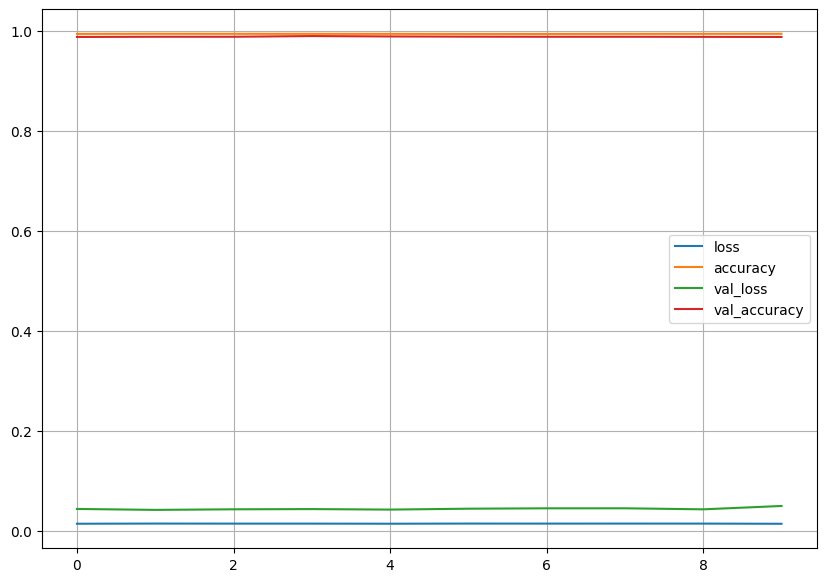

In [86]:
history = pd.DataFrame(history)
history.plot(figsize=(10,7))
plt.grid(True)
plt.show

In [87]:
X_new = X_test[:3]

y_prob =new_model.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 111ms/step


array([[1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)